In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D

In [2]:
#reading in the state abbreviations
path = '../google_trends/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.tail(12)

,State,Abbrev,Code
39,Rhode Island,R.I.,RI
40,South Carolina,S.C.,SC
41,South Dakota,S.D.,SD
42,Tennessee,Tenn.,TN
43,Texas,Tex.,TX
44,Utah,Utah,UT
45,Vermont,Vt.,VT
46,Virginia,Va.,VA
47,Washington,Wash.,WA
48,West Virginia,W.Va.,WV


In [3]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [4]:
#list for state names
state_names = [x for x in statesAbbrev_df['State']]

In [5]:
#creating lowercase no space state names appropriate for file names
state_names_for_files = [x.lower().replace(" ", "_") for x in state_names]

In [9]:
#reading in the df
states_df_dict = {}
path = f'../google_trends/google_trends_csvs/state_csvs/US-{state_codes[4]}_cat_data.csv'
states_df_dict[f'{state_codes[4]}_data_df'] = [pd.read_csv(path)]

In [10]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['CA_data_df'])

In [12]:
#test printing a df
print(state_codes[4])
states_df_dict[f'{state_codes[4]}_data_df'][0].head(10)

CA


,time,arts_entertainment,autos,beauty_fitness,books_lit,action_adventure,campaigns_elections,celebs,discrimination,entertainment_media,...,mobiles,online_vids,scifi_fantasy,sport_news,tv_shows,voice_vid_chat,weather,covid_cases,stay_at_home,mass_gathering_ban
0,2019-01-06,98,82,95,80,70,0,71,24,86,...,53,84,56,87,92,64,66,NaN,False,False
1,2019-01-13,96,81,89,82,72,0,66,27,78,...,52,86,56,74,88,59,82,NaN,False,False
2,2019-01-20,88,78,90,79,67,0,58,29,74,...,50,83,54,71,87,51,37,NaN,False,False
3,2019-01-27,93,78,89,82,65,0,63,32,70,...,52,82,55,74,85,67,75,NaN,False,False
4,2019-02-03,89,79,88,81,61,0,60,25,67,...,49,81,51,73,85,62,88,NaN,False,False
5,2019-02-10,96,78,84,84,59,0,62,31,71,...,49,83,58,63,87,60,100,NaN,False,False
6,2019-02-17,96,83,88,79,66,0,78,30,73,...,54,79,54,65,85,67,72,NaN,False,False
7,2019-02-24,99,82,86,90,61,0,70,35,69,...,53,80,53,68,92,63,66,NaN,False,False
8,2019-03-03,100,86,92,88,63,0,58,77,71,...,51,80,55,76,100,73,76,NaN,False,False
9,2019-03-10,94,83,90,82,60,0,62,29,70,...,49,80,52,90,90,64,46,NaN,False,False


In [13]:
col_names = list(states_df_dict[f'{state_codes[4]}_data_df'][0].columns)

In [14]:
cat_names = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]

In [15]:
times_list = list(states_df_dict[f'{state_codes[4]}_data_df'][0]['time'])

In [16]:
#getting rid of the nans in the covid cases columns (replacing with zeros)
states_df_dict[f'{state_codes[4]}_data_df'][0]['covid_cases'] = states_df_dict[f'{state_codes[4]}_data_df'][0]['covid_cases'].fillna(0)
    
    

In [17]:
#test printing a df to see if covid cols have nans
states_df_dict[f'{state_codes[4]}_data_df'][0].head()

,time,arts_entertainment,autos,beauty_fitness,books_lit,action_adventure,campaigns_elections,celebs,discrimination,entertainment_media,...,mobiles,online_vids,scifi_fantasy,sport_news,tv_shows,voice_vid_chat,weather,covid_cases,stay_at_home,mass_gathering_ban
0,2019-01-06,98,82,95,80,70,0,71,24,86,...,53,84,56,87,92,64,66,0.0,False,False
1,2019-01-13,96,81,89,82,72,0,66,27,78,...,52,86,56,74,88,59,82,0.0,False,False
2,2019-01-20,88,78,90,79,67,0,58,29,74,...,50,83,54,71,87,51,37,0.0,False,False
3,2019-01-27,93,78,89,82,65,0,63,32,70,...,52,82,55,74,85,67,75,0.0,False,False
4,2019-02-03,89,79,88,81,61,0,60,25,67,...,49,81,51,73,85,62,88,0.0,False,False


In [18]:
def stdev_mean_graph_maker(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    graphs_time_list = [x for x in all_data_df['time']]
    init_covid_list = [x for x in all_data_df['covid_cases']]
    
    for n in range(0, len(cat_names)):
        stdev_2019 = data_2019_df.std()[n]
        mean_for_state_2019 = data_2019_df[f'{cat_names[n]}'].mean()
        topline_2019 = mean_for_state_2019 + stdev_2019
        bottomline_2019 = mean_for_state_2019 - stdev_2019
        
        stdev_2020 = data_2020_df.std()[n]
        mean_for_state_2020 = data_2020_df[f'{cat_names[n]}'].mean()
        topline_2020 = mean_for_state_2020 + stdev_2020
        bottomline_2020 = mean_for_state_2020 - stdev_2020
        
        fig, ax = plt.subplots(figsize=(30,7))
        
        ax.plot(graphs_time_list, all_data_df[f'{cat_names[n]}'], color='black')
        
        ax.axhline(y=mean_for_state_2019, color='blue', linestyle='--', label='mean line 2019')
        
        ax.axhline(y=mean_for_state_2020, color='green', linestyle='--', label='mean line 2020')
        
        ax.axhline(y=topline_2019, color='blue', linestyle=':', label= '+1SD 2019')
        
        ax.axhline(y=bottomline_2019, color='blue', linestyle=':', label='-1SD 2019')
        
        ax.axhline(y=topline_2020, color='green', linestyle=':', label='+1SD 2020')
        
        ax.axhline(y=bottomline_2020, color='green', linestyle=':', label='-1SD 2020')
        
        ax.axvspan(graphs_time_list[51], graphs_time_list[52], facecolor='r', alpha=0.5)
        
        plt.xticks(graphs_time_list, rotation=90)
        
        plt.grid()
        plt.xlabel('date')
        plt.ylabel('% popularity')
        plt.legend(loc='upper left', ncol=3)
        plt.title(f'{state_names[ind_no]}: Popularity of Category {cat_names[n]} 2019-2020, and Covid Cases (2020), with StDev and Mean Lines for 2019 and 2020')
        
        ax2 = ax.twinx()
        colour_list = []
        for x in all_data_df['stay_at_home']:
            if x == True:
                colour_list.append('green')
            else:
                colour_list.append('blue')
        ax2.set_ylabel('covid_cases')  
        ax2.bar(graphs_time_list, init_covid_list, color=colour_list, align='center', alpha=0.3)
        ax2.tick_params(axis='y')
    
        custom_lines = [Line2D([0], [0], color='green', alpha=0.5, lw=3),
                    Line2D([0], [0], color='blue', alpha=0.5, lw=3)]

        ax2.legend(custom_lines, ['stay_at_home in effect', 'no stay_at_home'], loc='lower left')
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        
        plt.savefig(f'graphs_for_states/stdev_means_lines_graphs/{cat_names[n]}/{state_names_for_files[ind_no]}_{cat_names[n]}_graph.png')

        plt.show()

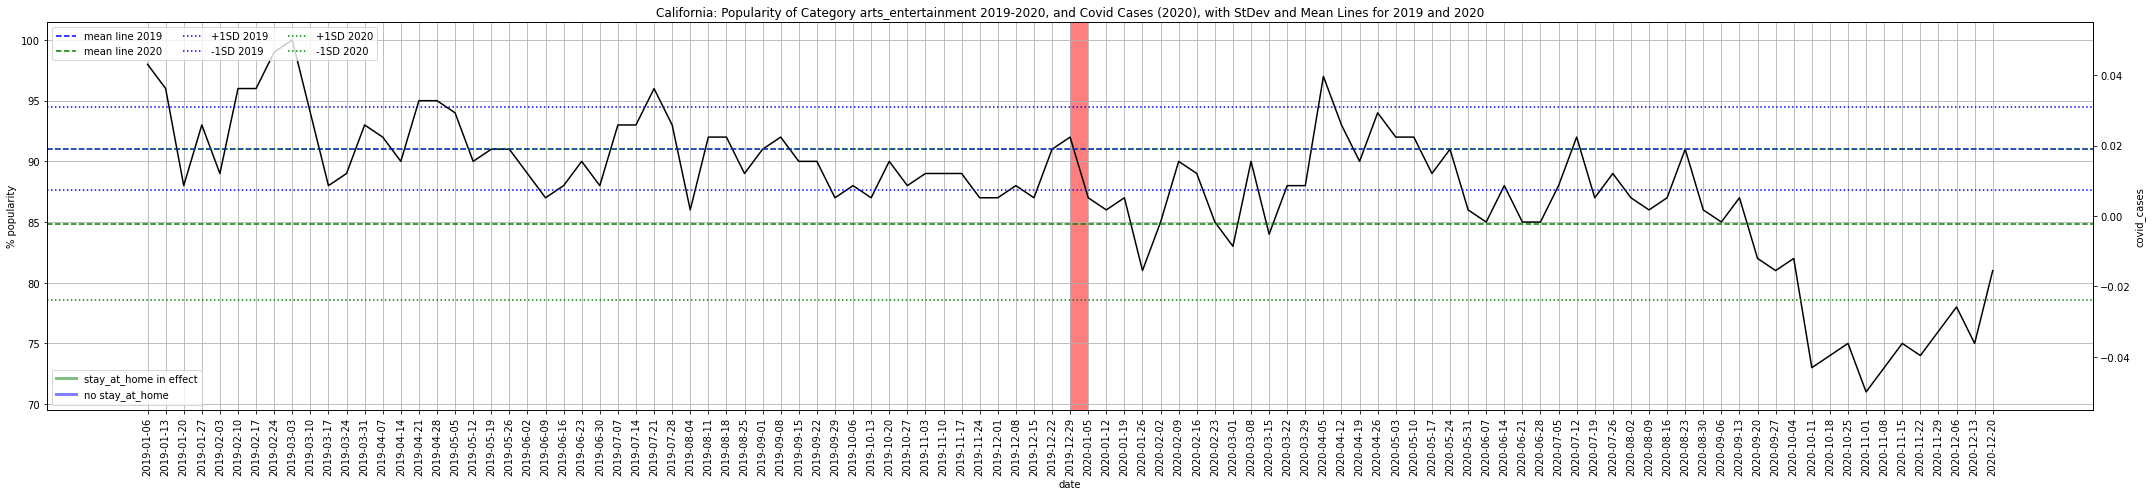

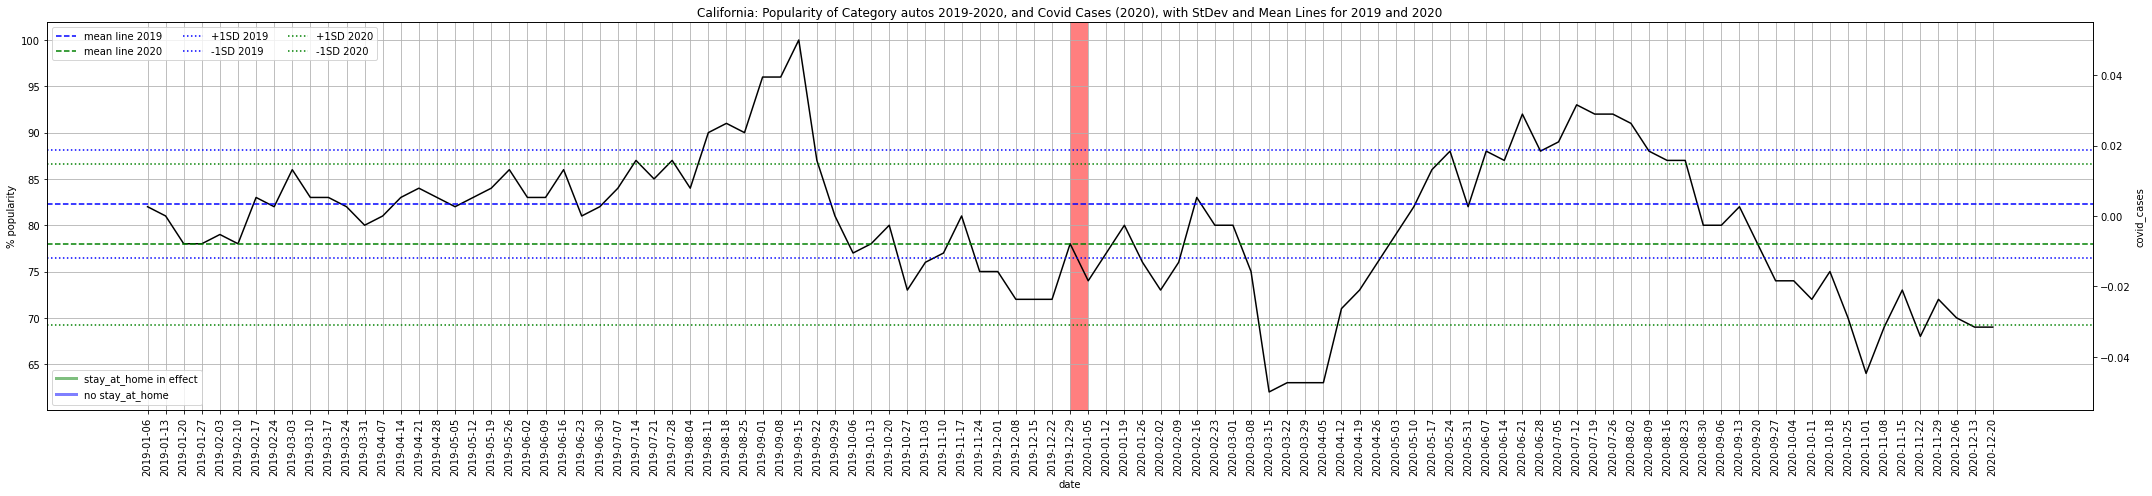

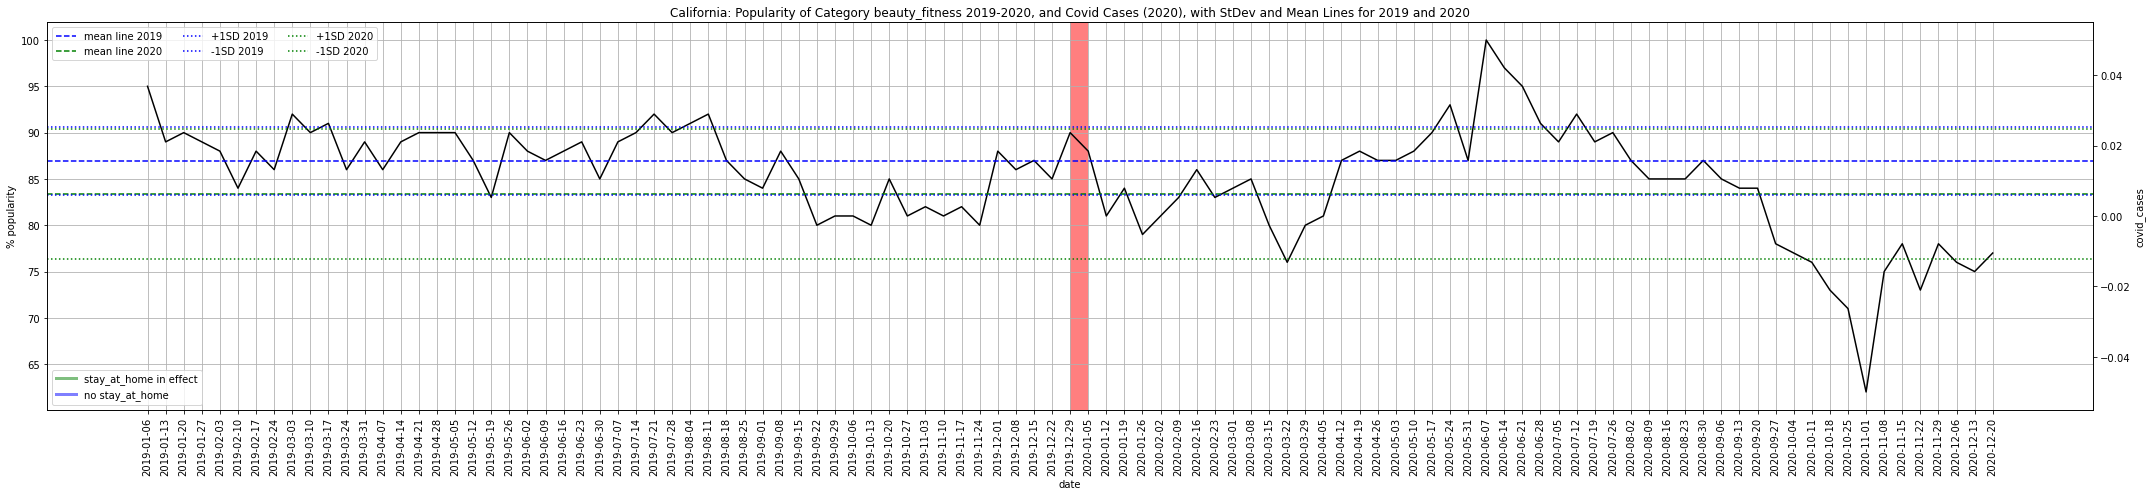

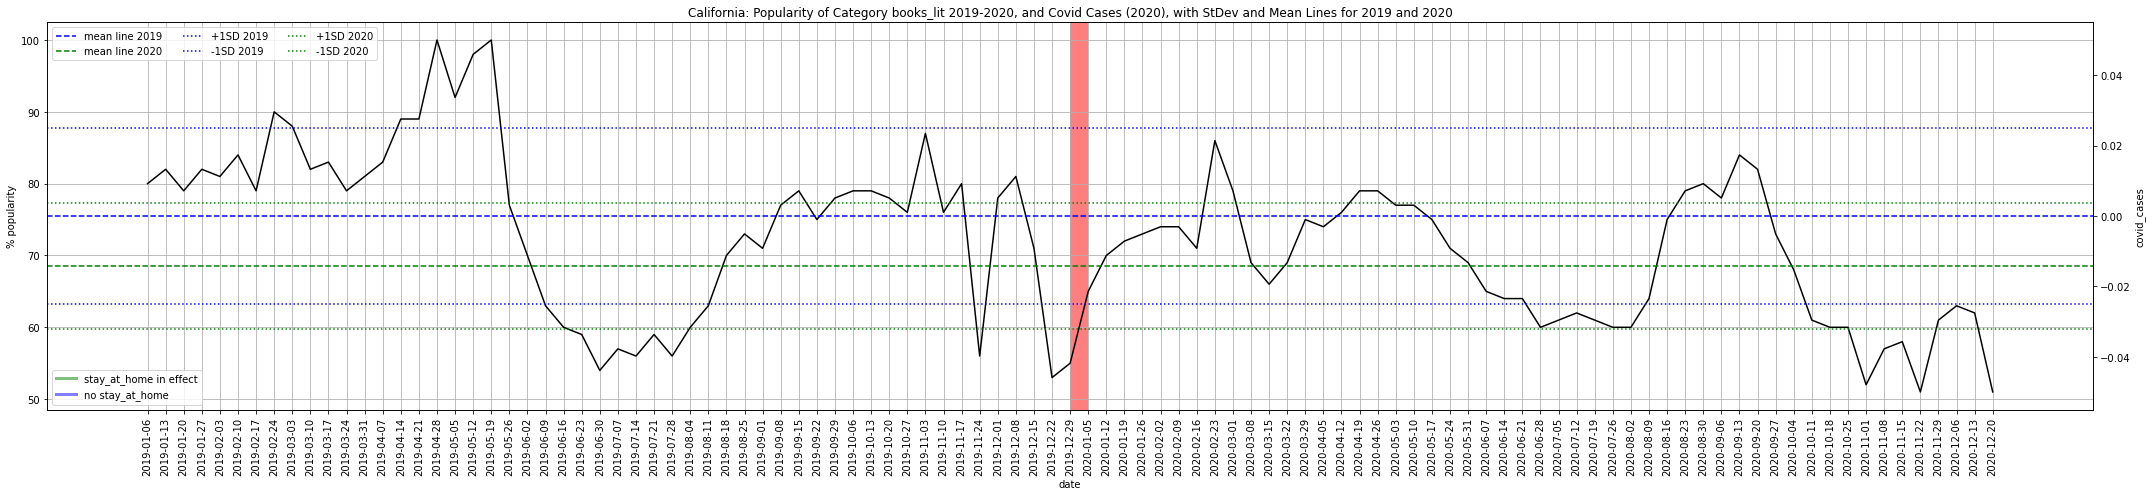

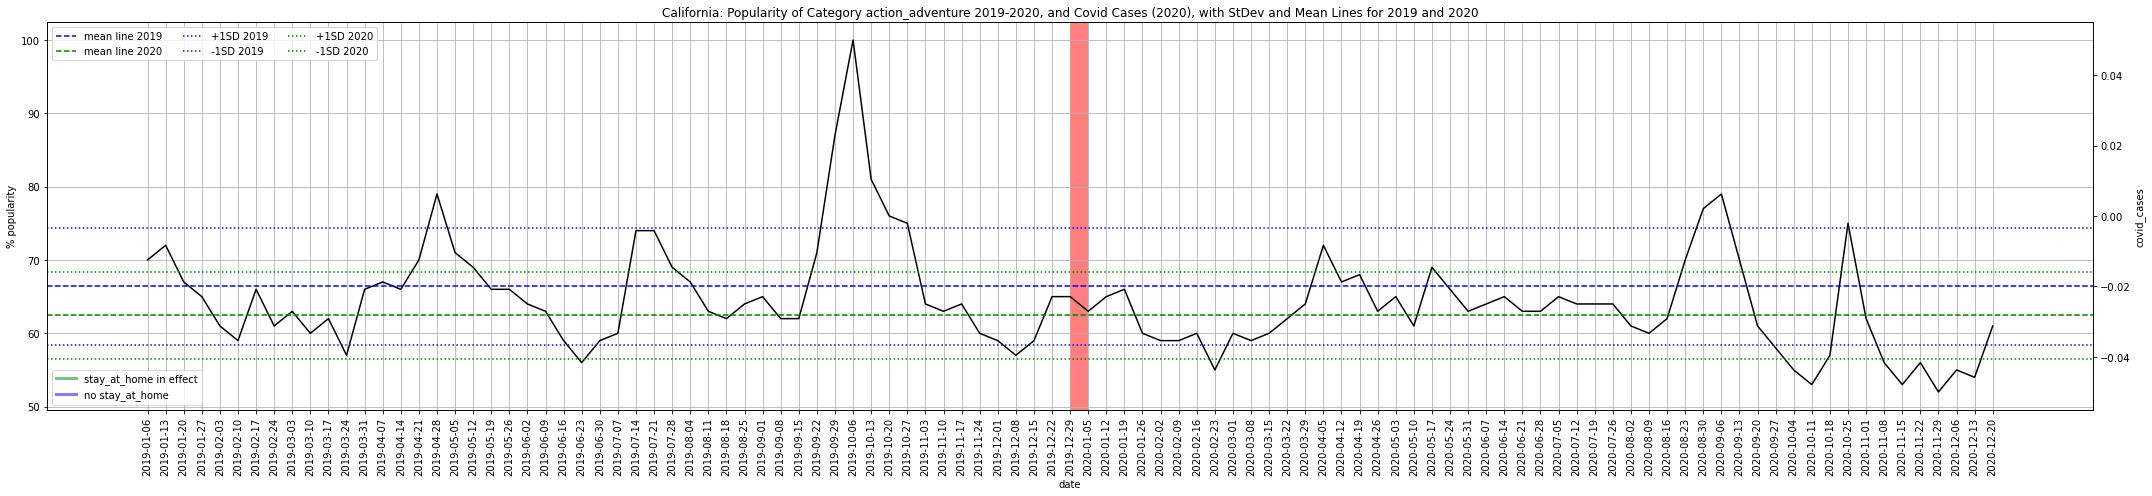

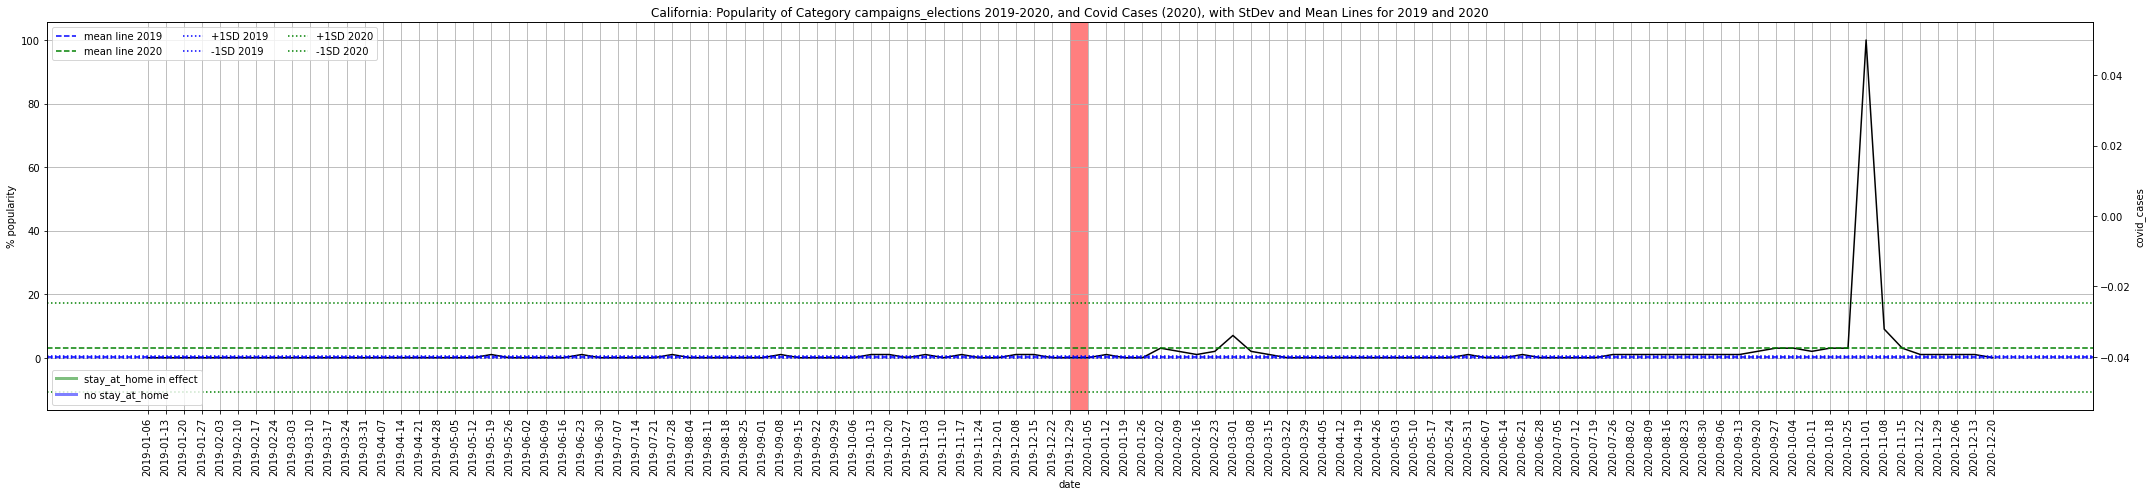

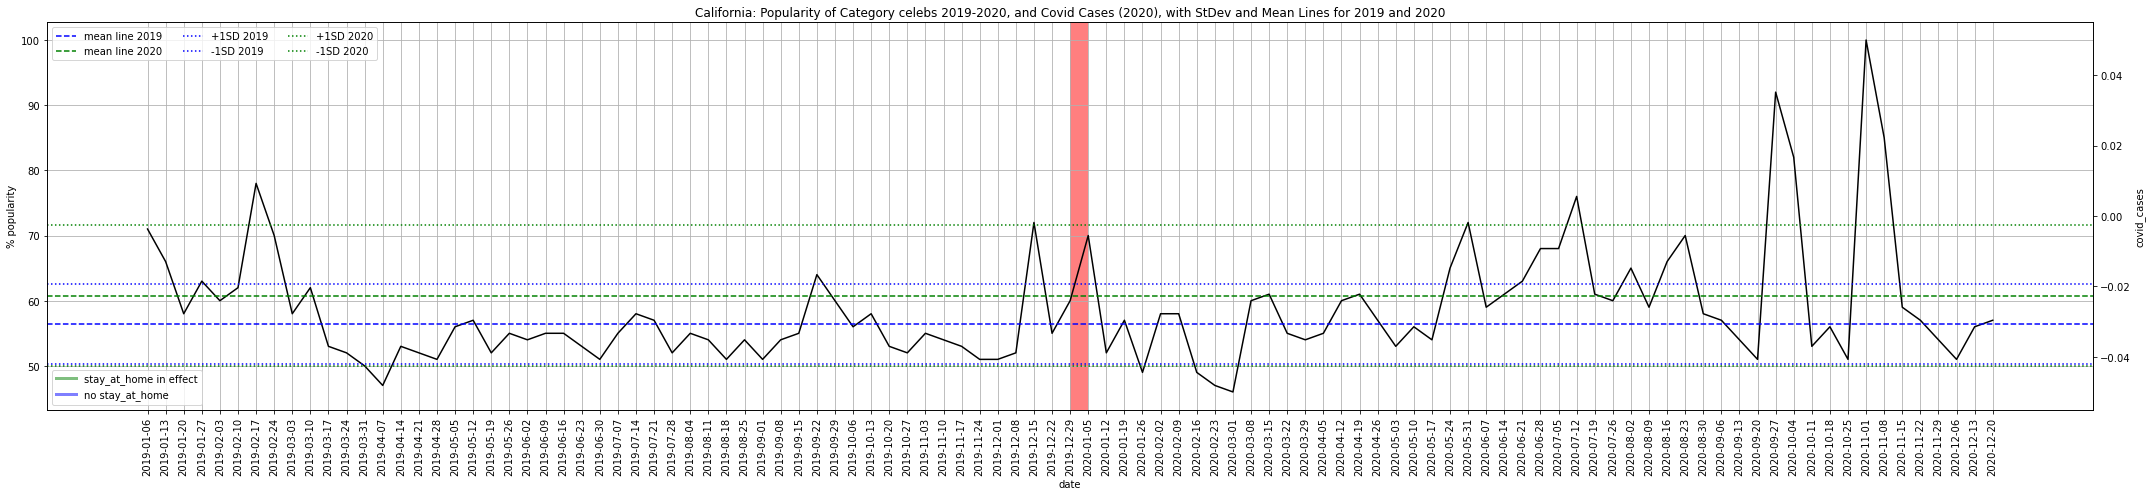

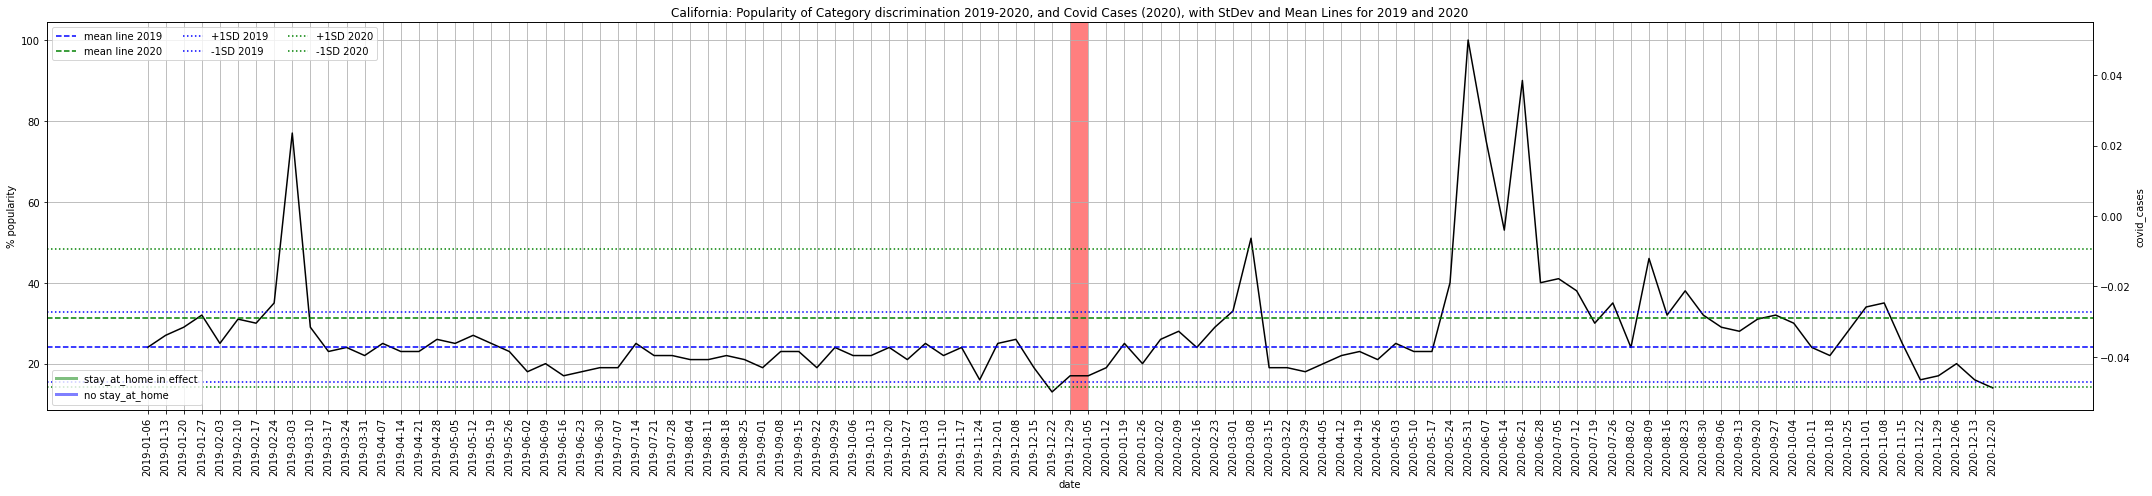

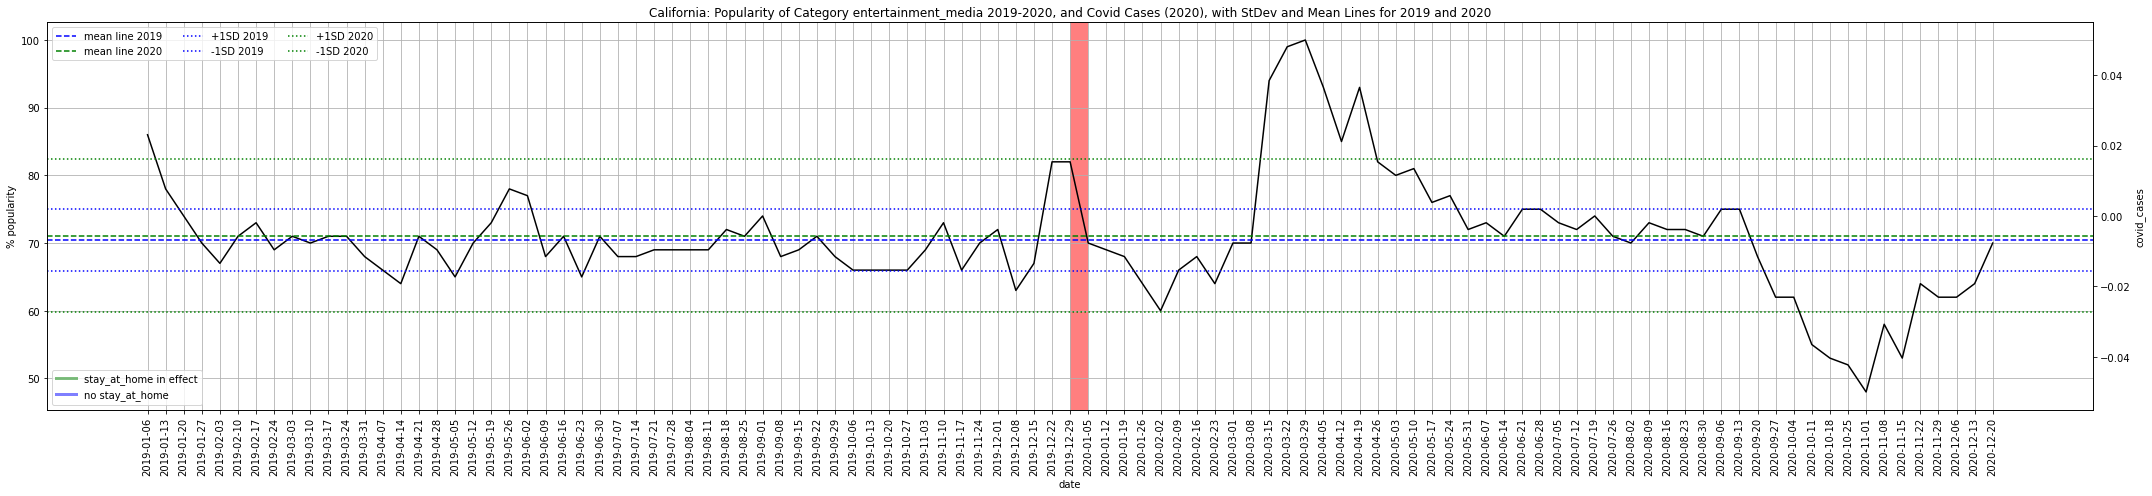

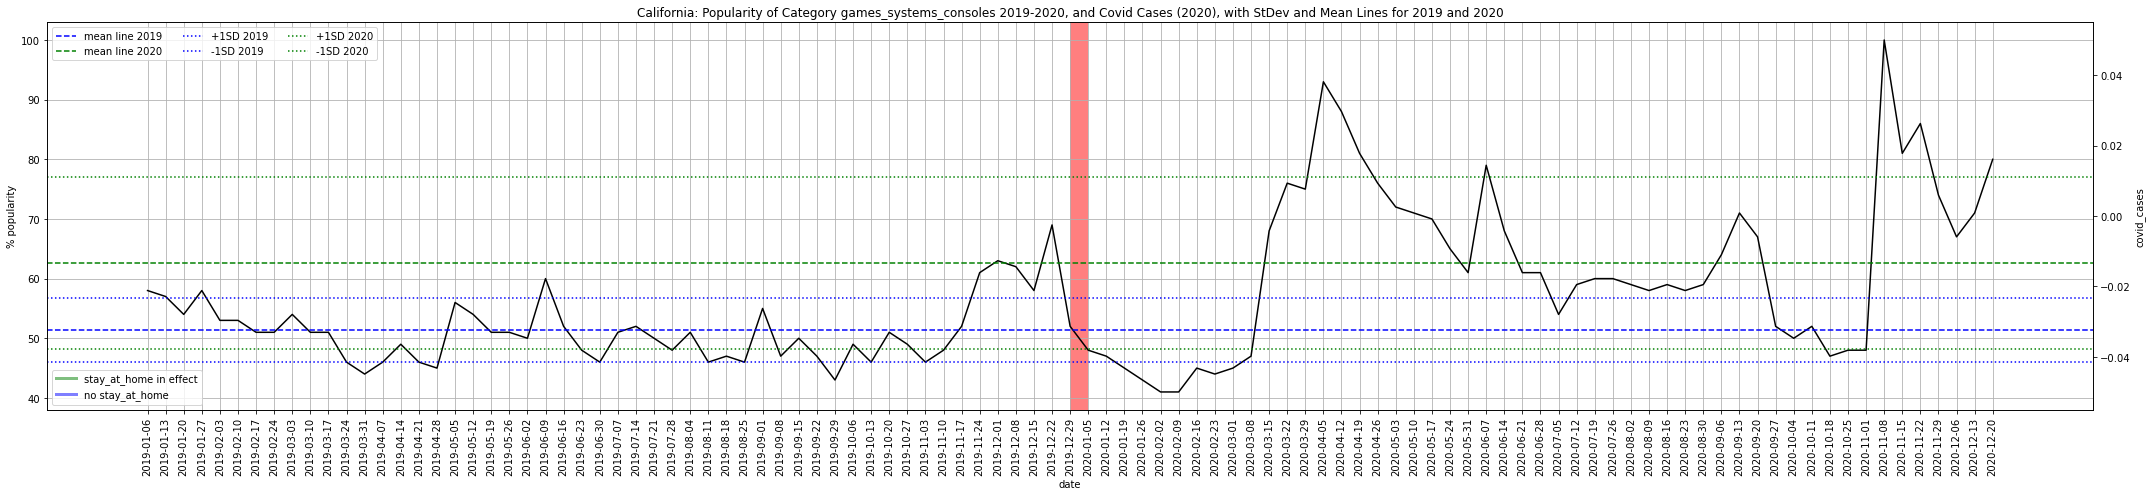

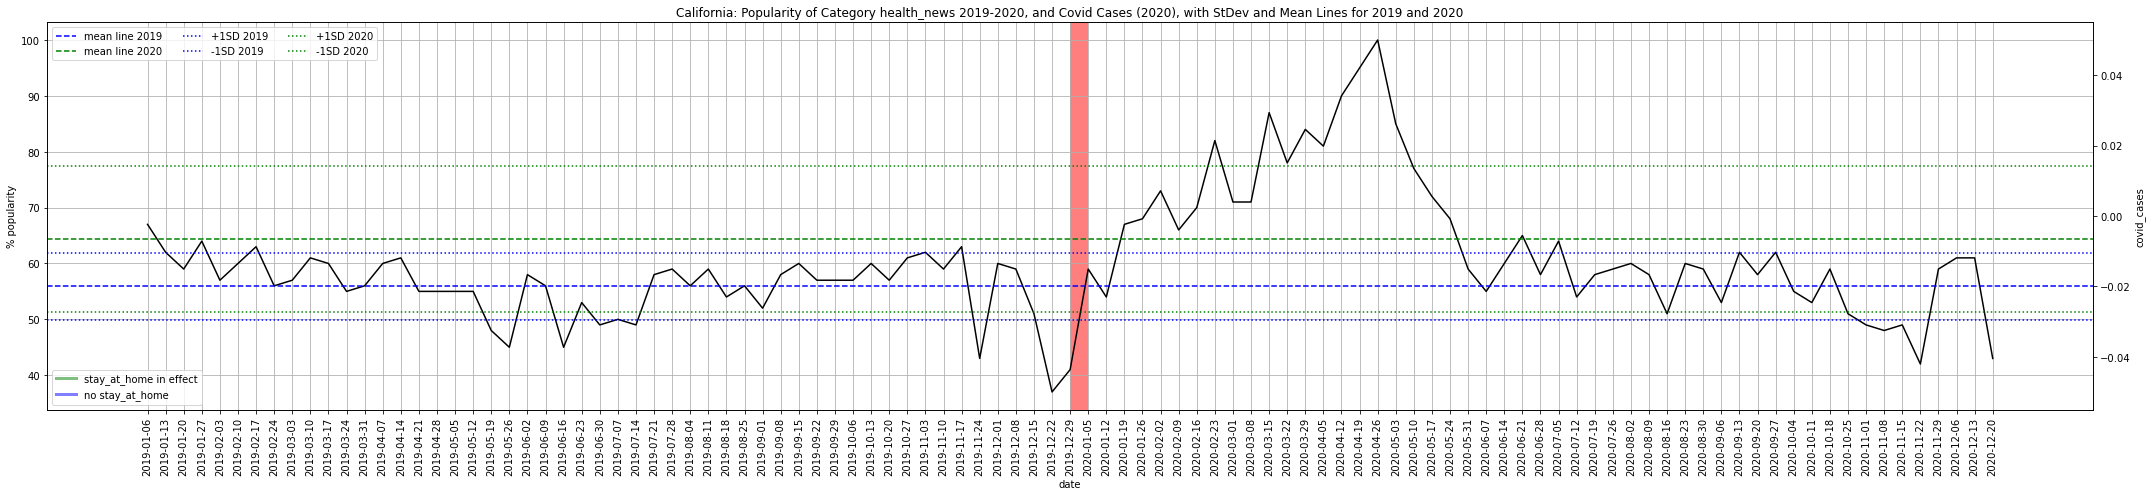

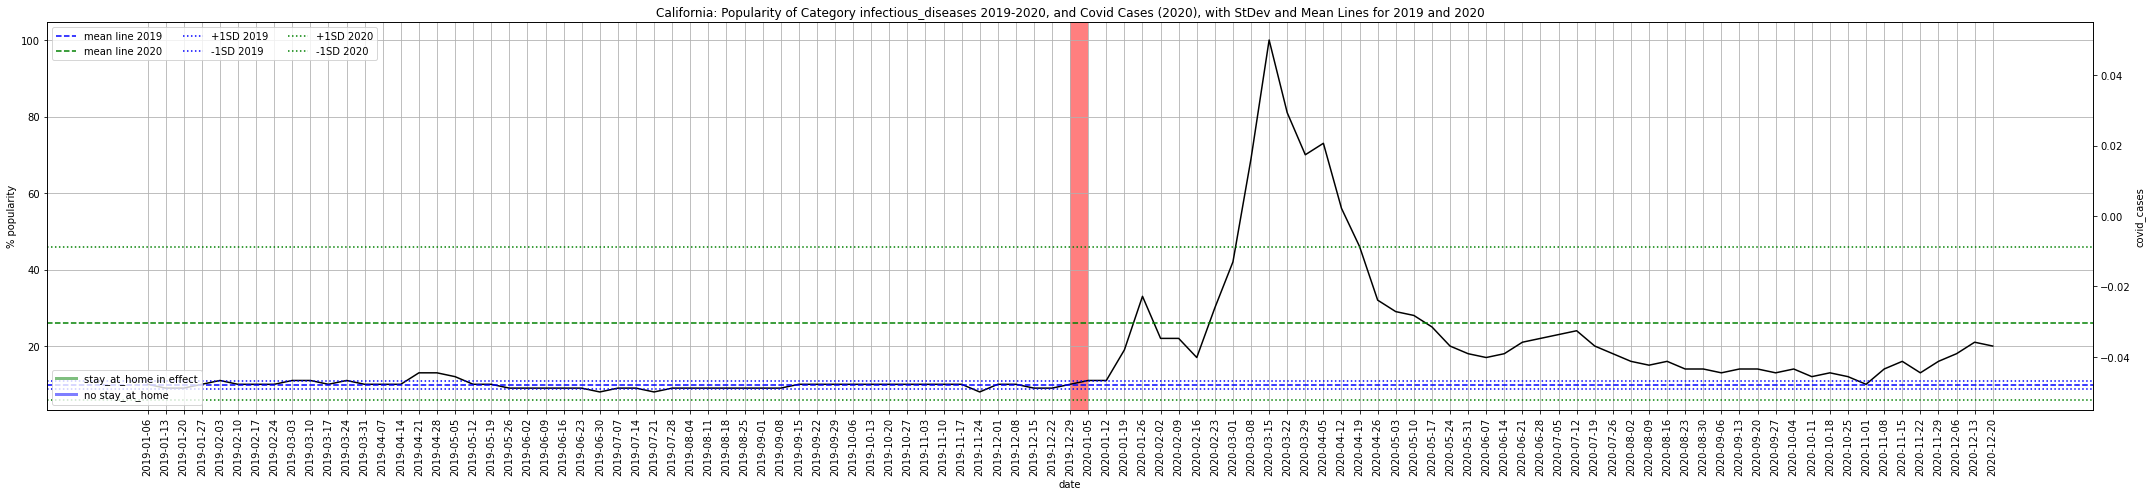

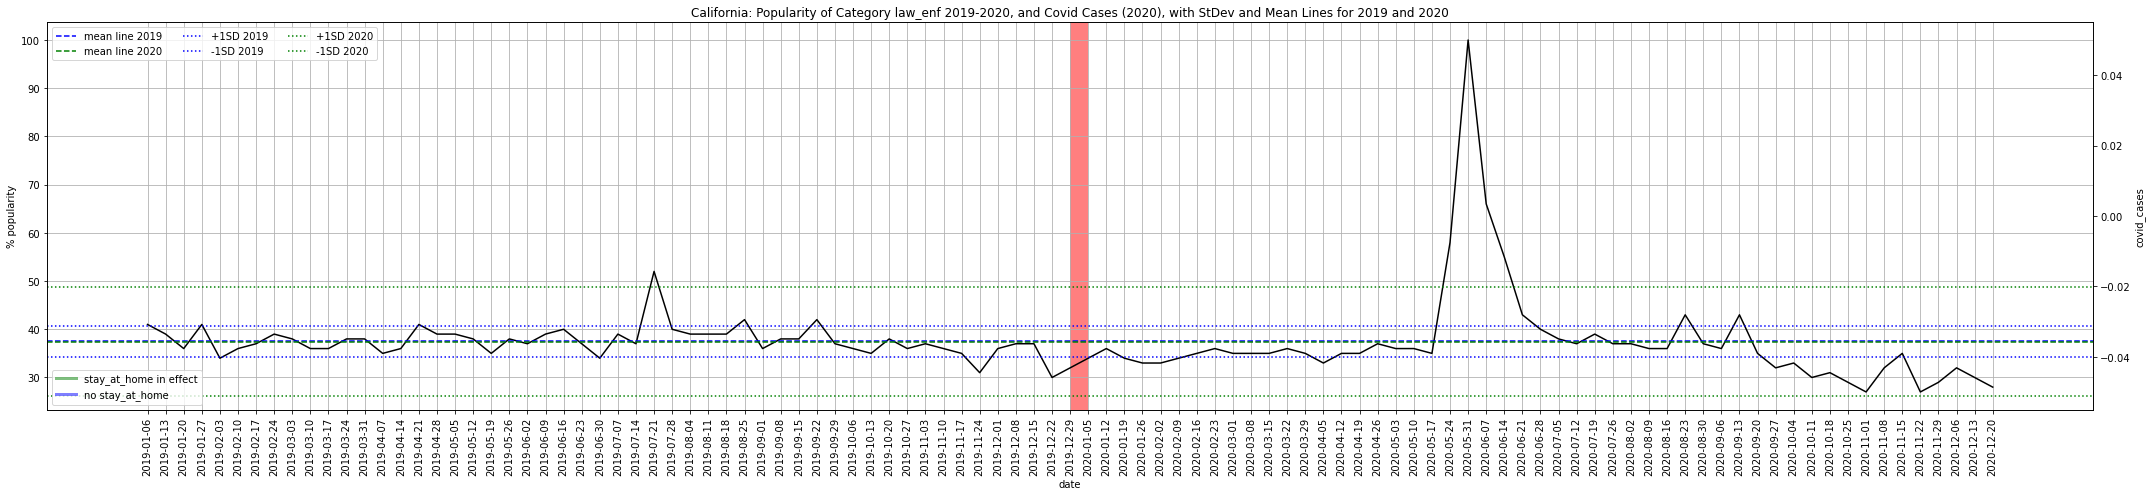

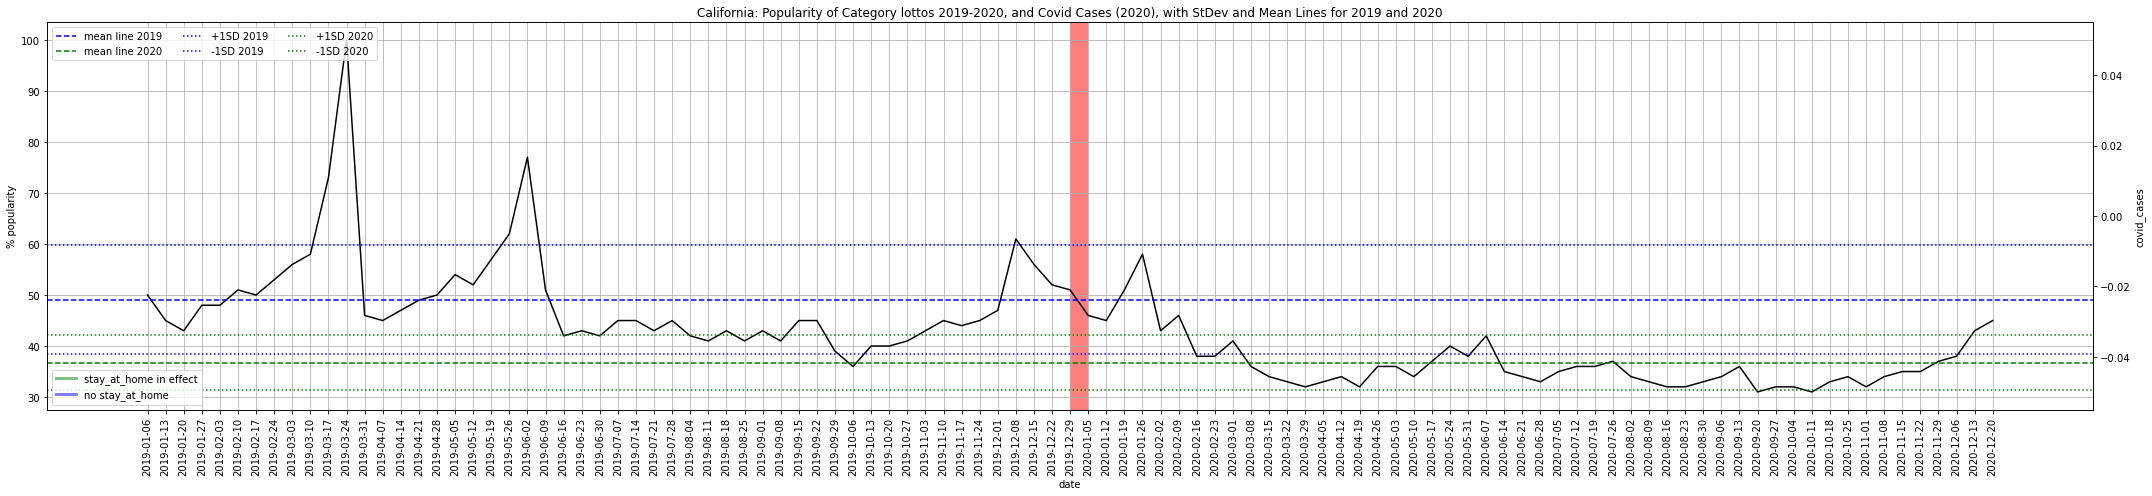

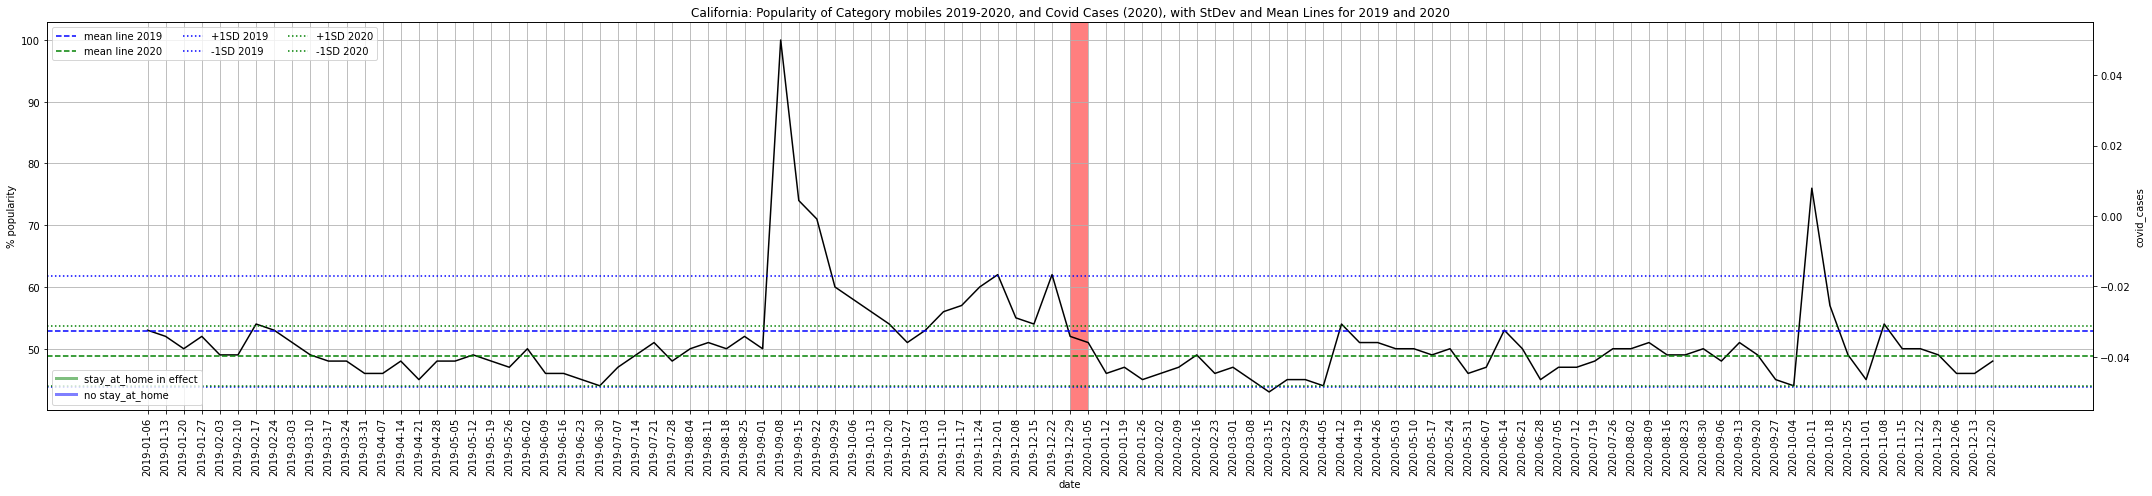

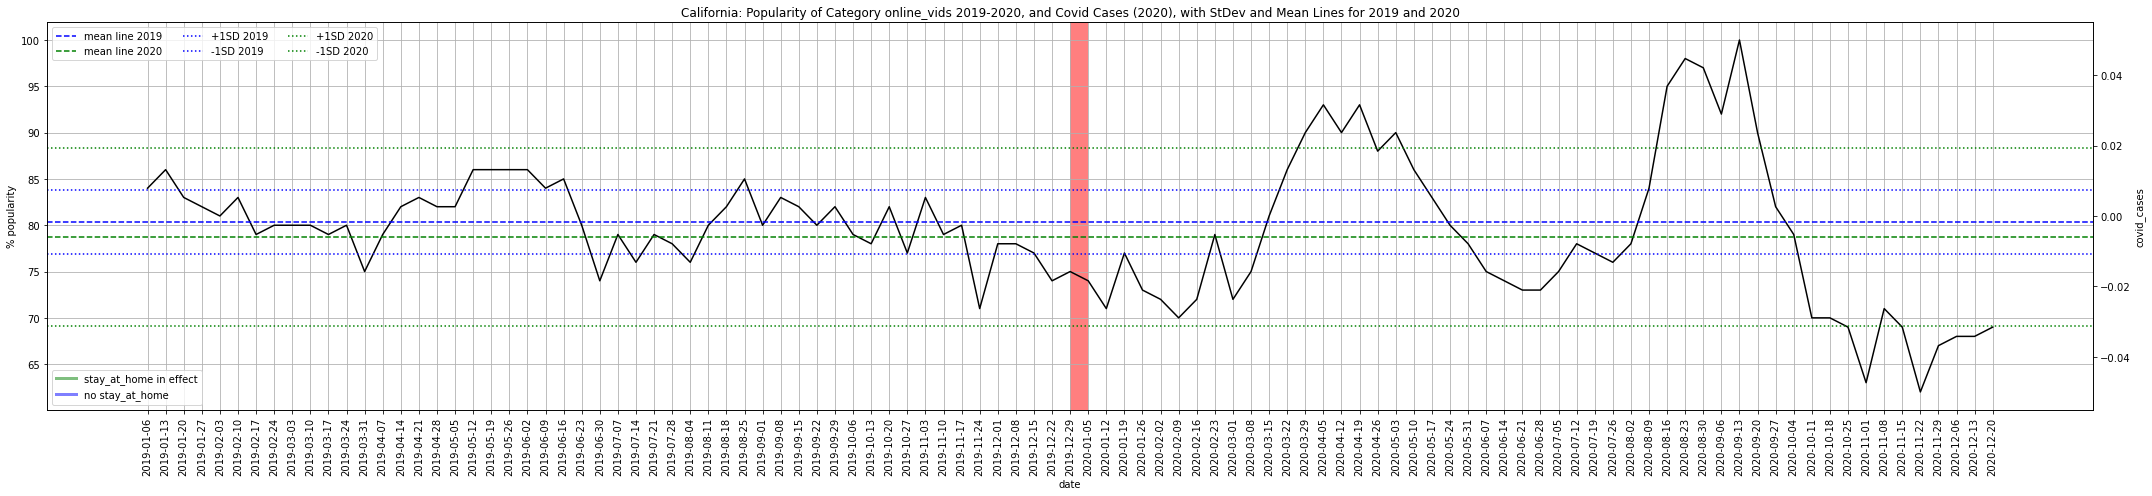

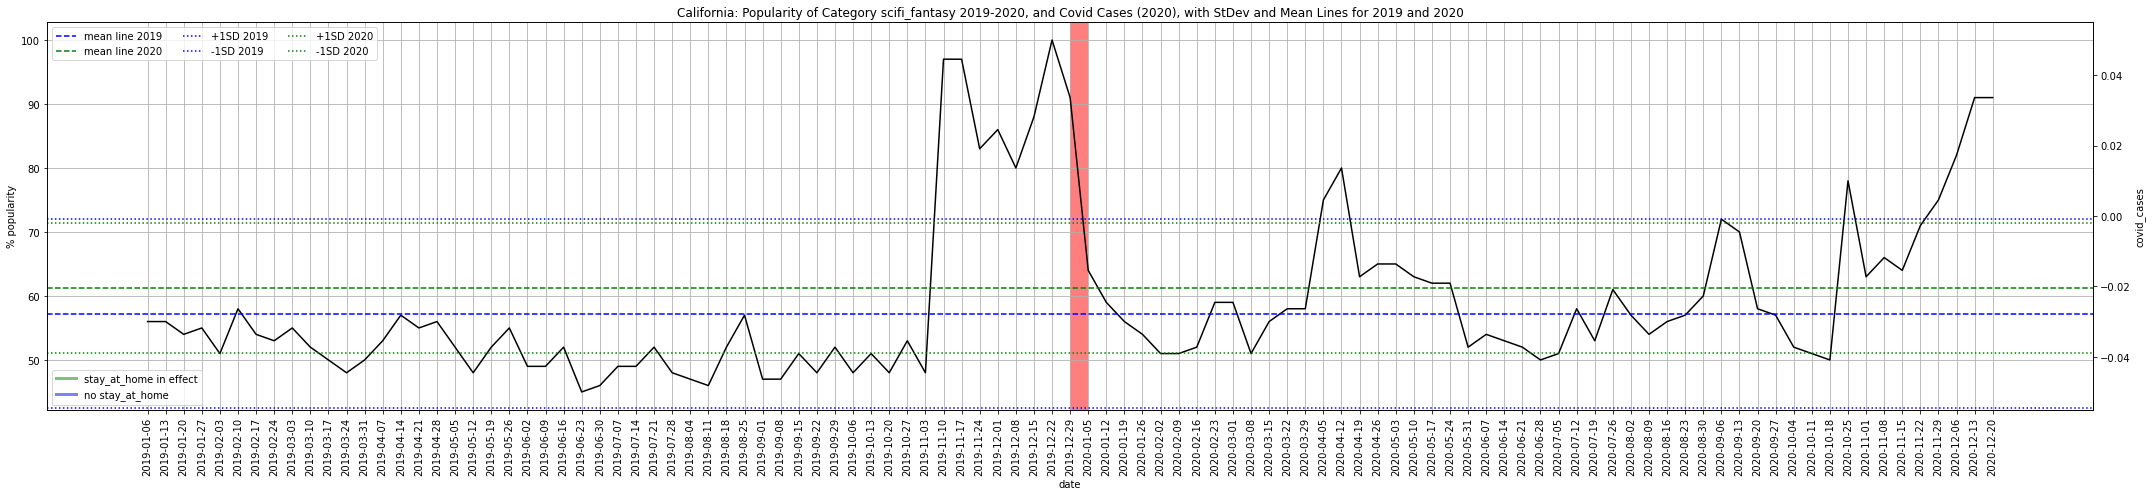

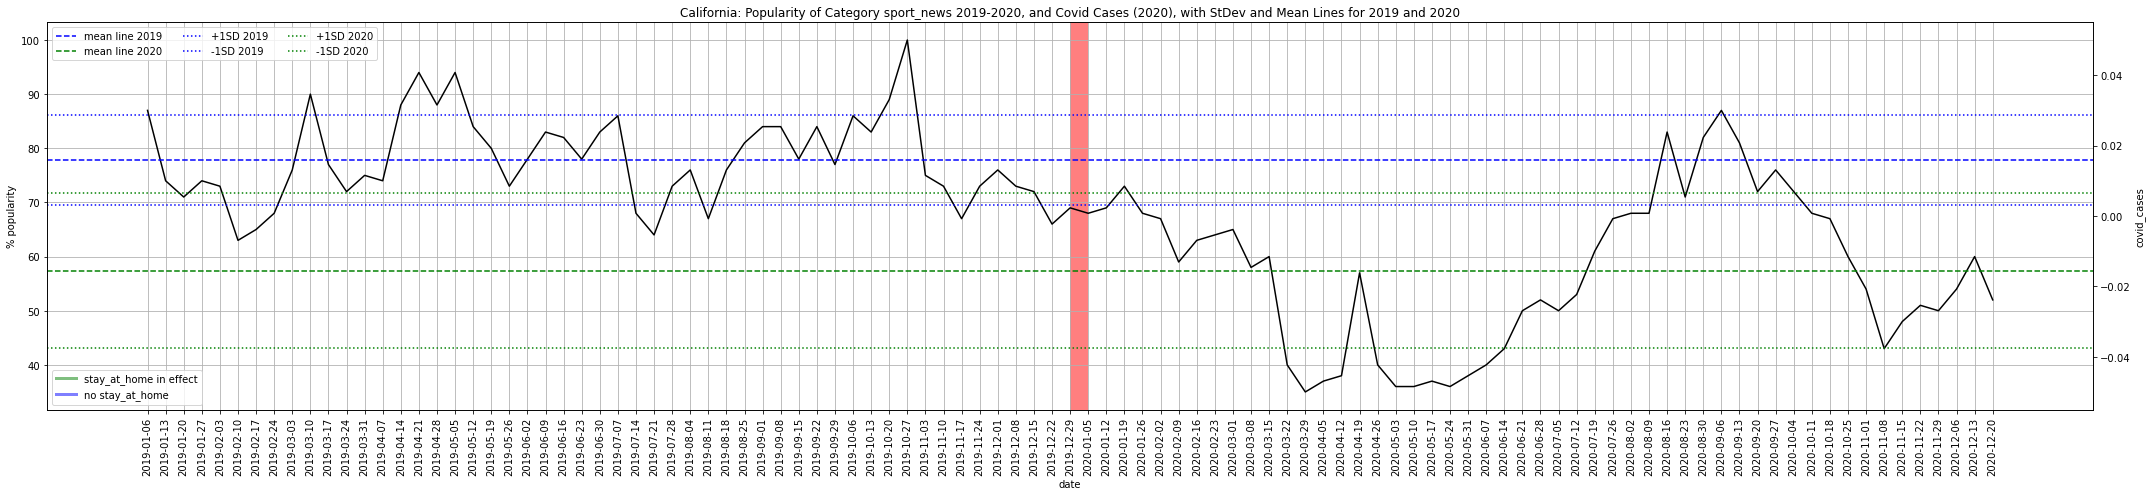

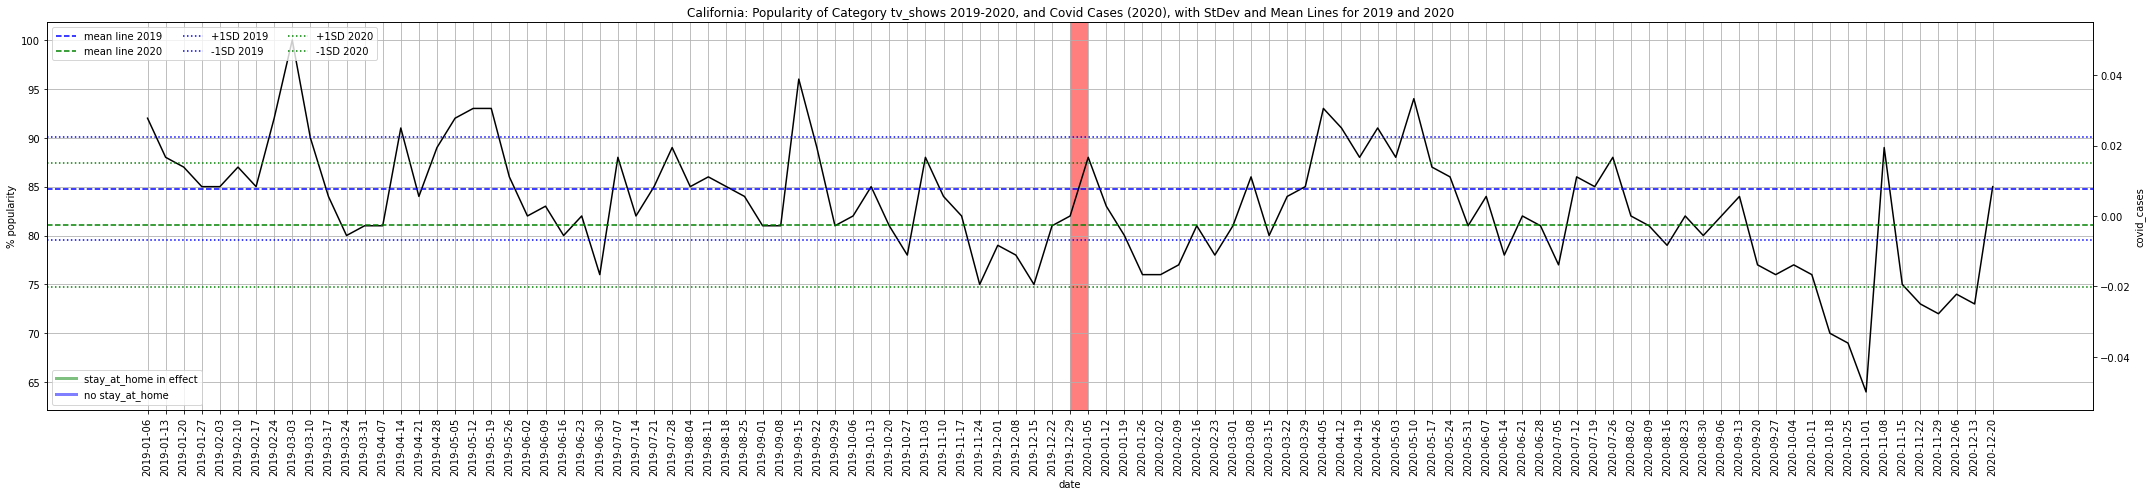

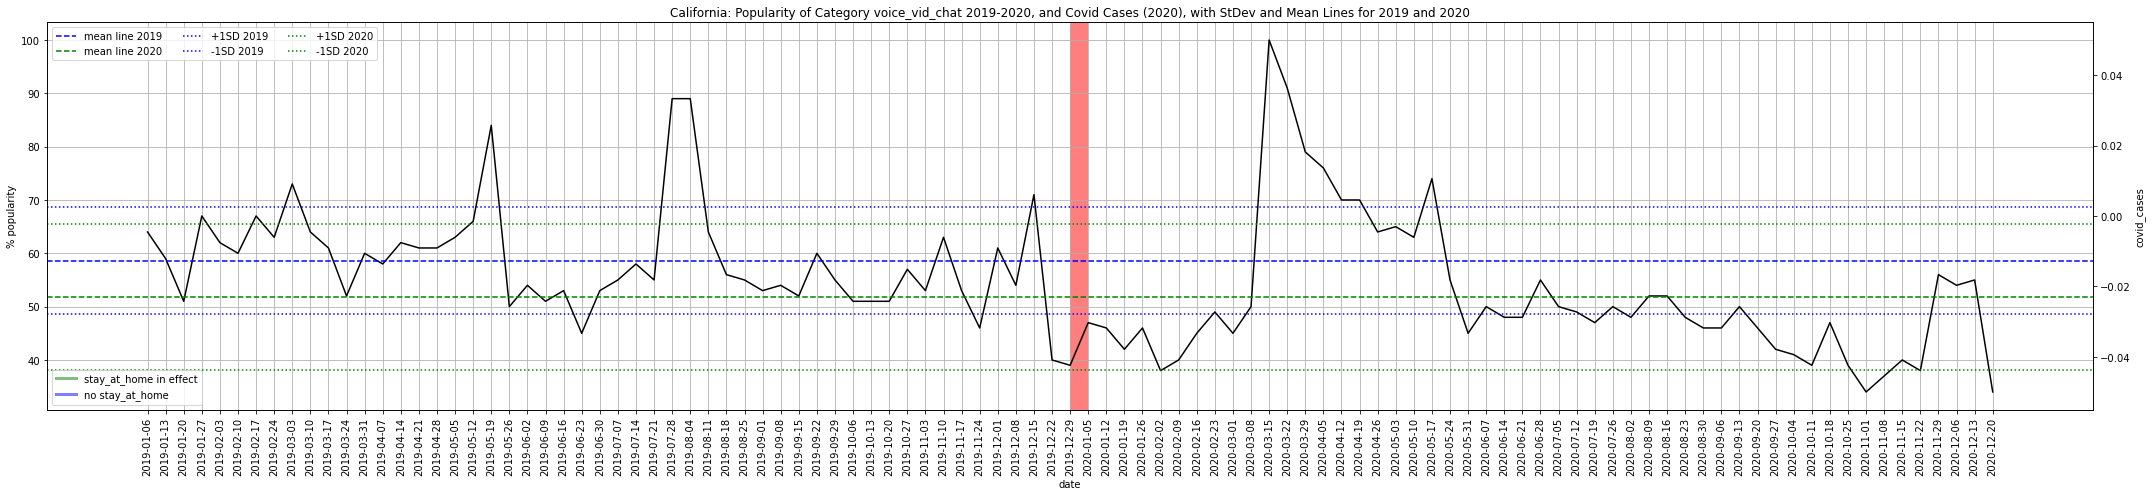

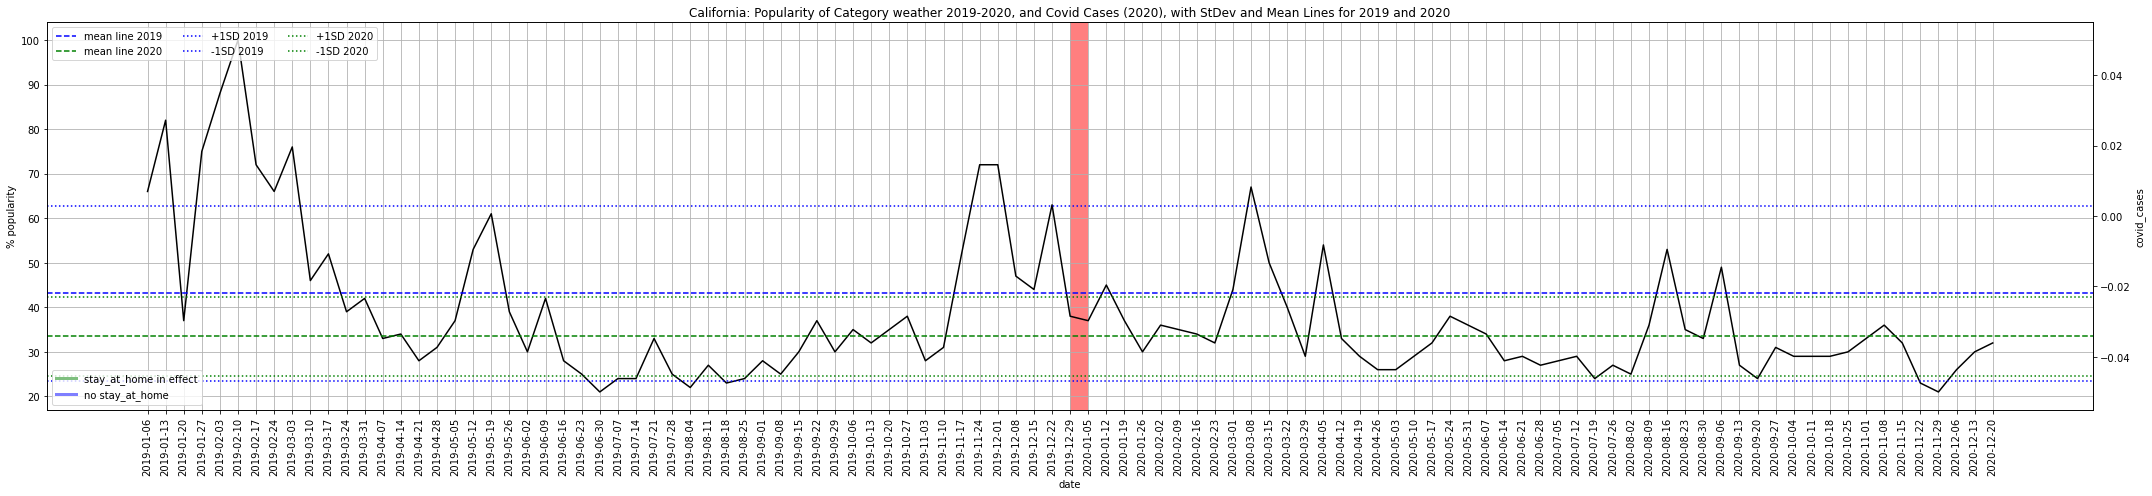

In [19]:
stdev_mean_graph_maker(4)